In [1]:
# Welcome to the HDMM_NN Tutorial! For an overview of what HDDM is about, as well as installation instructions, 
# visit the github page of this tutorial.

In [1]:
# Module imports
import hddm
import sys
import pandas as pd
import numpy as np
import sys
import pickle
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('simulators')
import cddm_data_simulation as cds
import boundary_functions as bf

from helper_functions import simulator
from helper_functions import model_plot
from helper_functions import caterpillar_plot
from helper_functions import hddm_preprocess_hierarchical
from helper_functions import simulator_condition_effects
# posterior predictive plot
# caterpillar plot
from helper_functions import _make_trace_plotready_condition

from helper_functions import hddm_preprocess

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [9]:
# Section 1: A look into DDM variations

In [10]:
# Let's simulate some data from the angle model and check the resulting (choice, reaction) time data.
# You can change the number of samples (n_samples), and the parameters of the model (v, a, w, ndt, theta). 
# If you are outside of the valid range for any parameter you will be warned.

In [11]:
# THE SIMULATOR FUNCTION
parameter_vector = [0, 1.6, 0.5, 0.0, 1.5, 1.5]
simulations = simulator(theta = parameter_vector, 
                        model = 'weibull_cdf', 
                        n_samples = 2000)
hddm_data = hddm_preprocess(simulations)

In [ ]:
# Plotting the data
ground_truths = np.random.uniform(low = [-2, 0.5, 0.3, 0.0, 0.3, 0.5], high = [2, 1.5, 0.7, 2.0, 1.0, 3], size = (10, 6))

model_plot(ground_truths = ground_truths,
           cols = 2, 
           model = 'angle',
           n_plots = 10,
           max_t = 5,
           show_model = False)

In [ ]:
hddm_model = hddm.HDDMnn_weibull(hddm_data, 
                                 informative = False, 
                                 free = False, 
                                 k = True,
                                 include = ['z', 'alpha', 'beta'],
                                 is_group_model = False)

In [ ]:
nmcmc = 1000
hddm_model.sample(nmcmc, burn = 200)

In [ ]:
hddm_model.get_traces()

In [ ]:
model_plot(ground_truths = np.array(parameter_vector),
           posterior_samples = hddm_model.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 100,
           cols = 1,
           n_plots = 1,
           max_t = 5, 
           show_model = True,
           input_hddm_trace = True,
           hierarchical = False)

In [ ]:
# Plotting Model Simulations

In [ ]:
# Section 3: FITTING NON-STANDARD MODELS HIERARCHICAL

In [ ]:
# ANGLE MODEL

In [2]:
hddm_data_hierarchical_angle = hddm_preprocess_hierarchical(model = 'angle', datasetid = 0)

In [3]:
hddm_data_hierarchical

(      response        rt  subj_idx  nn_response
 0          0.0  2.202141       0.0         -1.0
 1          1.0  1.756146       0.0          1.0
 2          0.0  1.698147       0.0         -1.0
 3          0.0  2.064142       0.0         -1.0
 4          0.0  1.943144       0.0         -1.0
 ...        ...       ...       ...          ...
 4995       0.0  2.491104       4.0         -1.0
 4996       1.0  2.261105       4.0          1.0
 4997       1.0  1.878110       4.0          1.0
 4998       0.0  2.188106       4.0         -1.0
 4999       0.0  2.316104       4.0         -1.0
 
 [5000 rows x 4 columns],
           v         a         z         t     theta
 0 -1.318299  1.570190  0.610825  1.438147  0.926974
 1 -1.330776  1.635546  0.608748  1.468413  0.924265
 2 -1.320850  1.531458  0.607654  1.557672  0.905594
 3 -1.312905  1.525236  0.609006  1.506820  0.942146
 4 -1.329437  1.553136  0.606771  1.454112  0.921670,
           v        a         z         t     theta
 0  0.006517 

In [4]:
hddm_hierarchical_model_angle = hddm.HDDMnn_angle(hddm_data_hierarchical[0], 
                                            free = False,  
                                            informative = False, 
                                            include = 'z',
                                            is_group_model = True)

In [5]:
# Sampling:
nmcmc = 100
hddm_hierarchical_model.sample(nmcmc,
                               burn = 50, 
                               dbname = 'traces_hierarchical_angle_tutorial.db', 
                               db = 'pickle')

 [-----------------101%-----------------] 101 of 100 complete in 196.1 sec

In [ ]:
# Caterpillar Plot


[[[-1.34489368  1.88747401  0.61823548  1.36620107  1.00818085]
  [-1.36709363  1.90073337  0.62552692  1.35649828  1.00795325]
  [-1.40674487  1.90185369  0.62940385  1.35416632  1.00260226]
  ...
  [-1.33732256  1.72787714  0.61139711  1.39361736  0.9633231 ]
  [-1.33042855  1.72976967  0.61417818  1.4114807   0.98872007]
  [-1.33982013  1.75537991  0.61175721  1.40484037  0.9890008 ]]

 [[-1.2523993   1.6577732   0.60896467  1.44860228  0.92734074]
  [-1.24784867  1.67295871  0.60074456  1.45308211  0.93189455]
  [-1.31403025  1.68279426  0.61189297  1.43528175  0.9227234 ]
  ...
  [-1.33117014  1.74647819  0.62060224  1.41821442  0.94850427]
  [-1.2642801   1.76262492  0.60433014  1.42062053  0.94730142]
  [-1.29342638  1.78310637  0.60042511  1.42353869  0.95487317]]

 [[-1.4583653   1.57110651  0.61187727  1.58071988  0.93477194]
  [-1.36512698  1.58274208  0.60359051  1.56408961  0.93553681]
  [-1.41796046  1.58872836  0.62536288  1.56610888  0.93889881]
  ...
  [-1.31866456  1.

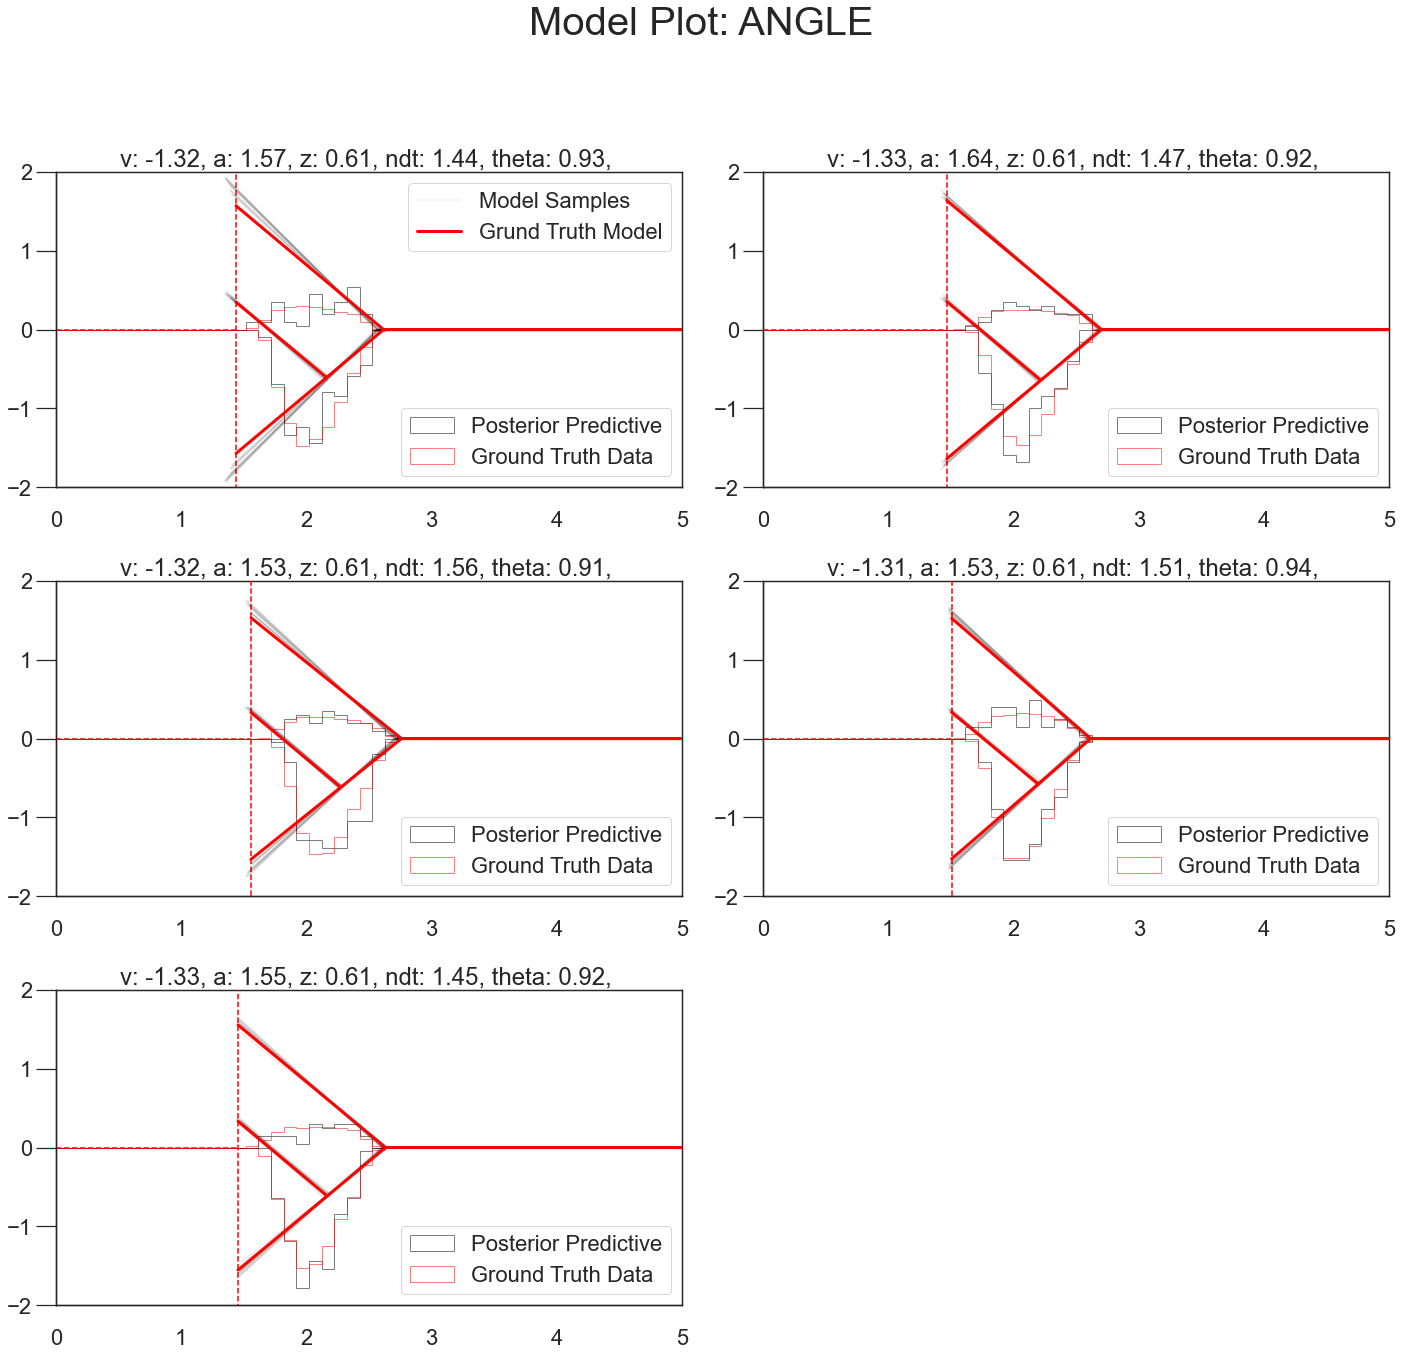

In [15]:
# Posterior Predictive
model_plot(ground_truths = hddm_data_hierarchical_angle[1].values,
           posterior_samples = hddm_hierarchical_model_angle.get_traces(),
           input_hddm_trace = True,
           n_post_params = 20,
           cols = 2, 
           model = 'angle',
           datatype = 'hierarchical',
           n_plots = 5,
           max_t = 5,
           show_model = True)

In [2]:
# WEIBULL
hddm_data_hierarchical_weibull_cdf = hddm_preprocess_hierarchical(model = 'weibull_cdf', datasetid = 1)

In [3]:
gt_weibull_cdf = {}
gt_weibull_cdf['subj'] = hddm_data_hierarchical_weibull_cdf[1]
gt_weibull_cdf['global_means'] = hddm_data_hierarchical_weibull_cdf[2]
gt_weibull_cdf['global_sds'] = hddm_data_hierarchical_weibull_cdf[3]

In [8]:
hddm_data_hierarchical_weibull_cdf

(      response        rt  subj_idx  nn_response
 0          1.0  2.125856       0.0          1.0
 1          1.0  1.877859       0.0          1.0
 2          0.0  2.042857       0.0         -1.0
 3          0.0  2.124856       0.0         -1.0
 4          1.0  2.590876       0.0          1.0
 ...        ...       ...       ...          ...
 4995       0.0  2.953006       4.0         -1.0
 4996       0.0  2.591989       4.0         -1.0
 4997       0.0  1.353976       4.0         -1.0
 4998       1.0  2.305975       4.0          1.0
 4999       0.0  2.496984       4.0         -1.0
 
 [5000 rows x 4 columns],
           v         a         z         t     alpha      beta
 0 -0.060218  1.313313  0.384968  1.151865  2.133997  1.569213
 1 -0.075177  1.290445  0.435621  1.098726  2.150635  1.658163
 2 -0.066992  1.307375  0.411264  1.150821  2.203776  1.542108
 3 -0.137658  1.285835  0.425311  1.098753  2.142593  1.626302
 4 -0.066513  1.310350  0.429493  1.122976  2.156340  1.734752,
     

In [5]:
hddm_hierarchical_model_weibull_cdf = hddm.HDDMnn_weibull(hddm_data_hierarchical_weibull_cdf[0], 
                                                         free = False,  
                                                         informative = False, 
                                                         include = 'z',
                                                         k = True,
                                                         is_group_model = True)

In [6]:
nmcmc = 100
hddm_hierarchical_model_weibull_cdf.sample(nmcmc, burn = 50)

 [-----------------101%-----------------] 101 of 100 complete in 215.9 sec

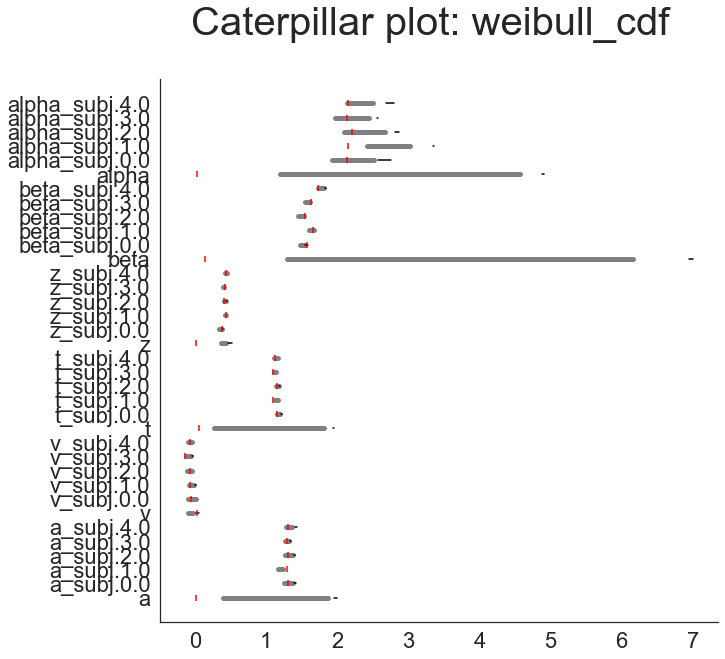

In [7]:
# Caterpillar Plot
caterpillar_plot(trace = hddm_hierarchical_model_weibull_cdf.get_traces(),
                 gt = hddm_data_hierarchical_weibull_cdf,
                 model = 'weibull_cdf',
                 datatype = 'hierarchical',
                 drop_sd = True)

In [15]:
hddm_hierarchical_model_weibull_cdf.get_traces()

,a,a_std,a_subj.0.0,a_subj.1.0,a_subj.2.0,a_subj.3.0,a_subj.4.0,v,v_std,v_subj.0.0,...,beta_subj.2.0,beta_subj.3.0,beta_subj.4.0,alpha,alpha_std,alpha_subj.0.0,alpha_subj.1.0,alpha_subj.2.0,alpha_subj.3.0,alpha_subj.4.0
0,1.539961,25.898149,1.972514,1.211706,1.242227,0.896652,1.999616,-0.097576,53.058324,0.013274,...,1.513672,6.510128,1.533343,2.482869,19.023401,1.412396,2.953917,2.548991,4.669947,0.798725
1,1.377826,1.774836,1.950026,1.199361,1.244950,0.897566,1.999577,1.729114,15.056312,0.006372,...,1.496613,6.244004,1.479006,3.183202,60.959081,1.217210,2.733339,2.549758,4.876665,0.782192
2,1.318960,31.719547,1.992836,1.215032,1.281925,0.894824,1.991915,-1.492604,8.434858,-0.046420,...,1.476668,6.833568,1.497613,0.472416,13.728448,1.271073,2.529554,2.536839,4.972414,0.801528
3,1.851237,71.004832,1.996688,1.183083,1.268800,0.908872,1.988467,-1.012742,2.020888,0.012061,...,1.478403,6.984483,1.573860,4.365739,56.808069,1.283813,2.876018,2.644684,4.959921,0.819182
4,0.589272,49.846826,1.998861,1.220187,1.250023,0.884309,1.997548,0.331679,56.803513,0.032486,...,1.468816,6.957977,1.653708,1.400236,74.648729,1.328828,2.624294,2.772649,4.988902,0.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.682037,25.935797,1.232734,1.279144,1.269934,0.890714,1.986224,1.842301,19.676816,-0.112535,...,1.453614,6.623658,1.469024,3.550503,10.674638,2.558159,2.626093,2.917987,4.598723,0.967719
96,1.053748,64.857752,1.243260,1.274083,1.257303,0.904361,1.995020,1.878778,74.582203,-0.054375,...,1.475823,6.452933,1.535521,3.149682,22.584268,2.651551,2.695705,2.571878,4.740305,1.002962
97,1.867200,78.640043,1.241669,1.285267,1.231999,0.900631,1.989889,2.242304,35.838798,-0.032203,...,1.499928,6.785620,1.518586,0.878977,62.067232,2.726066,2.306770,2.702020,4.608177,0.984963
98,0.429757,2.231513,1.241145,1.284978,1.268250,0.905674,1.965811,-0.944864,56.466078,-0.049780,...,1.493844,6.843143,1.520815,2.975344,41.767950,2.680942,2.299054,2.681611,4.418538,0.901776


5


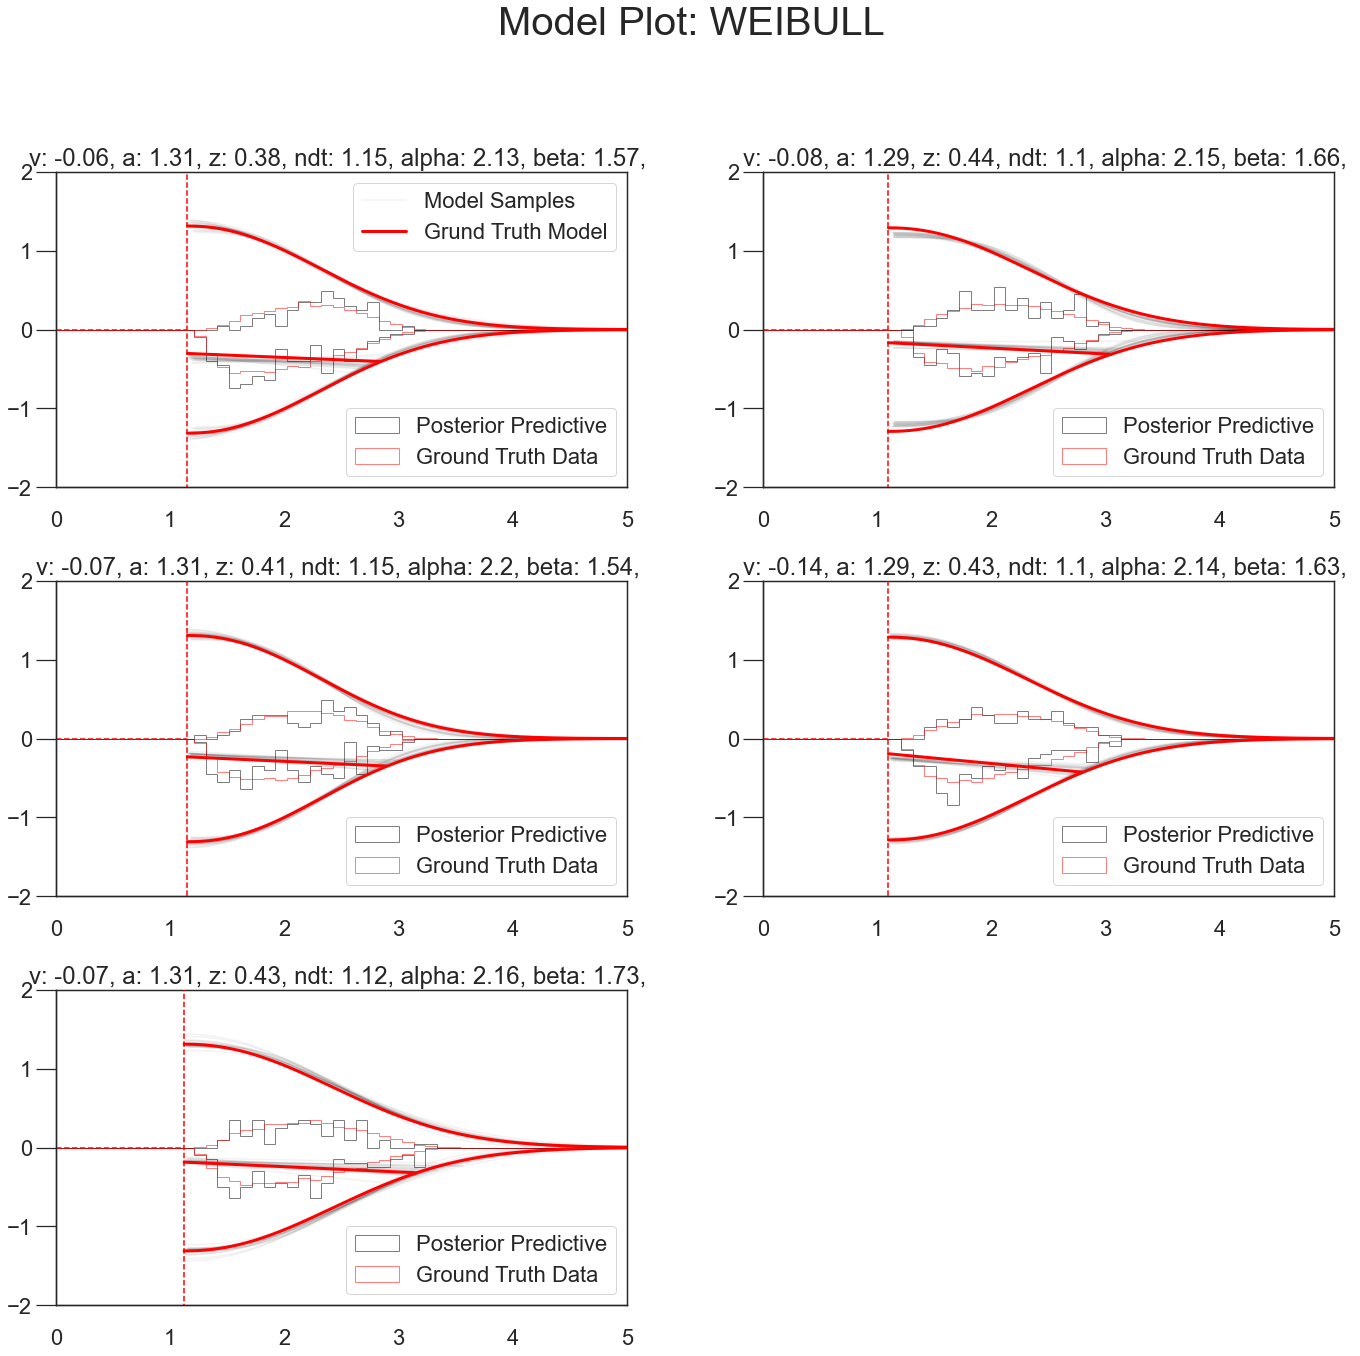

In [11]:
# Posterior Predictive
model_plot(ground_truths = hddm_data_hierarchical_weibull_cdf[1].values,
           posterior_samples = hddm_hierarchical_model_weibull_cdf.get_traces(),
           input_hddm_trace = True,
           n_post_params = 20,
           cols = 2, 
           model = 'weibull_cdf',
           datatype = 'hierarchical',
           n_plots = 5,
           max_t = 5,
           show_model = True)

In [5]:
hddm_model = hddm.HDDMnn_weibull(hddm_data, 
                                 informative = False, 
                                 free = False, 
                                 k = True,
                                 include = ['z', 'alpha', 'beta'],
                                 is_group_model = False)

In [9]:
nmcmc = 1000
hddm_model.sample(nmcmc, burn = 200)

 [-----------------100%-----------------] 1000 of 1000 complete in 138.7 sec

In [10]:
hddm_model.get_traces()

,a,v,t,z_trans,beta,alpha
0,1.497511,0.060983,0.007088,-0.053400,1.482289,1.993545
1,1.523406,0.052095,0.008915,-0.045420,1.473380,1.891263
2,1.527825,0.079265,0.006084,-0.083930,1.462140,1.958254
3,1.529958,0.119047,0.003428,-0.042336,1.450367,1.978350
4,1.483779,0.046406,0.003696,-0.043863,1.488772,1.938957
...,...,...,...,...,...,...
795,1.514884,0.060670,0.003915,-0.046581,1.480905,1.970826
796,1.483264,0.039455,0.001454,0.015134,1.477827,1.990380
797,1.487002,0.037083,0.010964,0.008989,1.501488,1.944020
798,1.505162,0.038777,0.004210,-0.020306,1.520560,1.905658


1
[[0.  1.6 0.5 0.  1.5 1.5]]
(1, 6)
passed through legend part
0
0


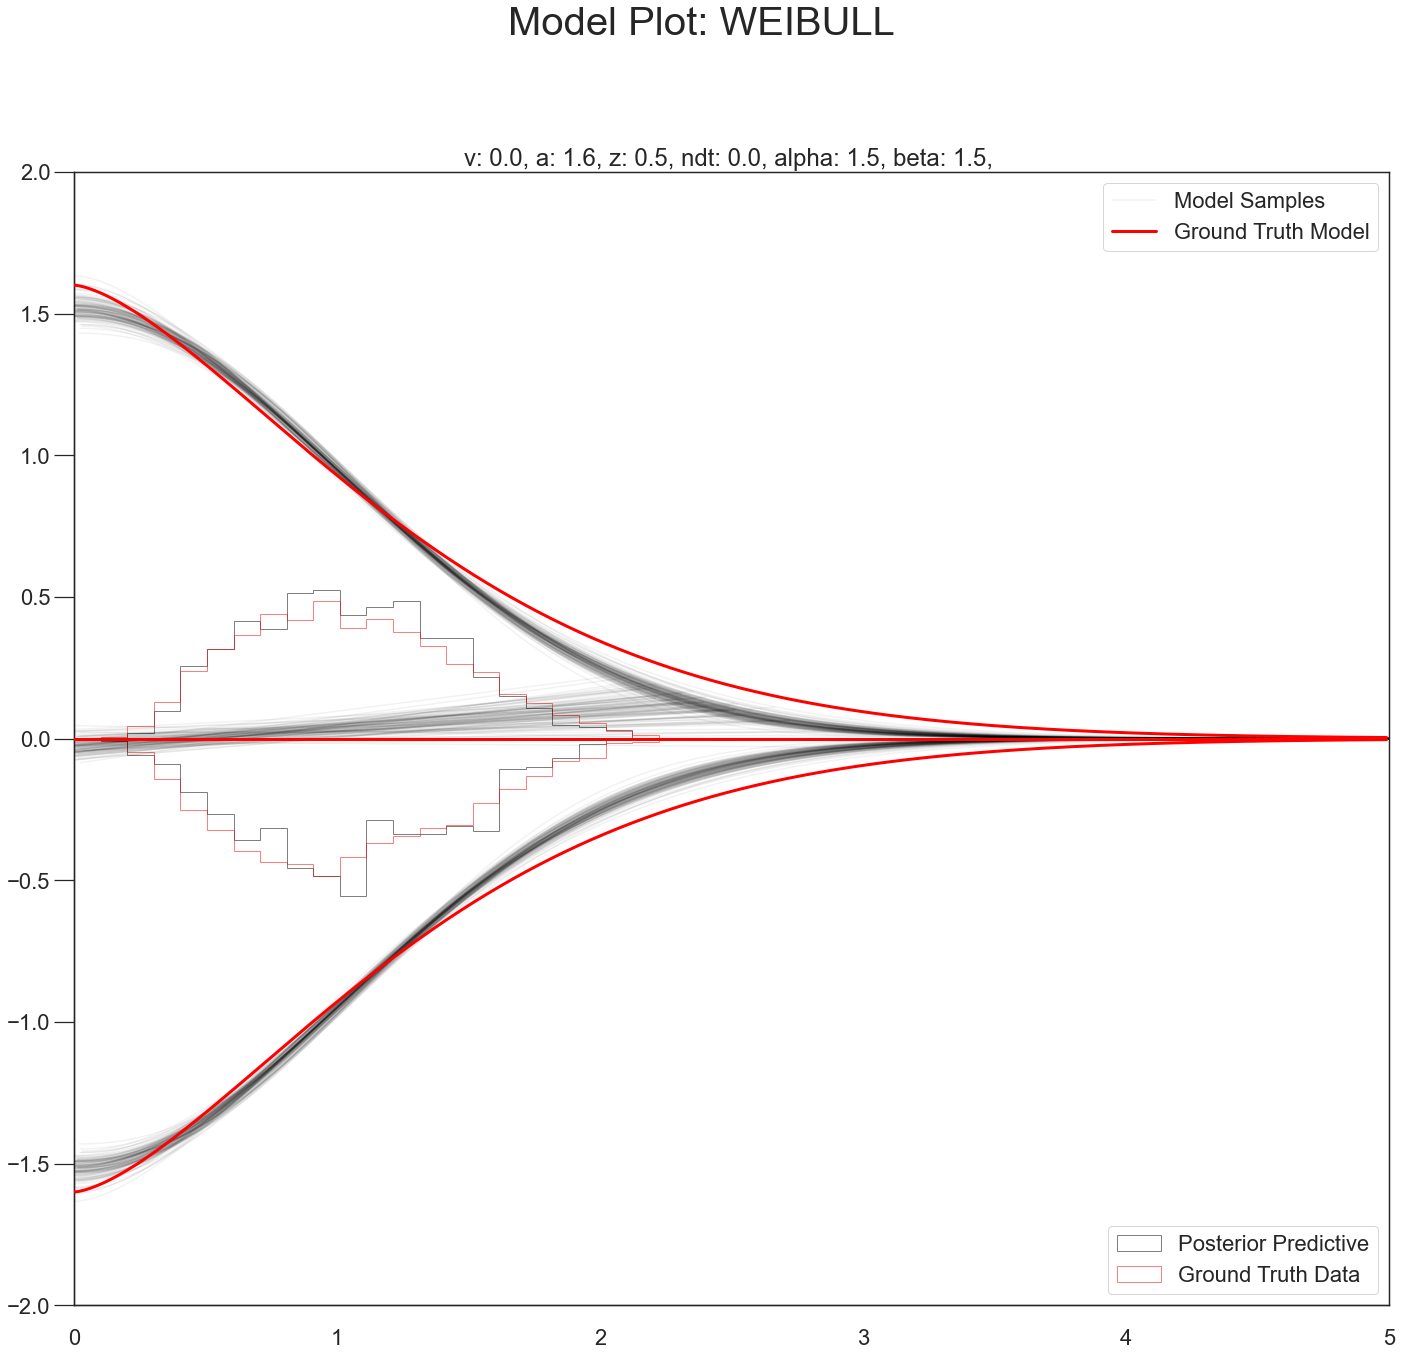

In [11]:
model_plot(ground_truths = np.array(parameter_vector),
           posterior_samples = hddm_model.get_traces(),
           model = 'weibull_cdf',
           n_post_params = 100,
           cols = 1,
           n_plots = 1,
           max_t = 5, 
           show_model = True,
           input_hddm_trace = True,
           hierarchical = False)

In [ ]:
# ANGLE 

# MODEL PLOT:


In [7]:
# WEIBULL_CDF

# MODEL PLOT:


In [ ]:
# PARAMETER VARIES BY CONDITION

In [4]:
hddm_data_condition, gt_condition, gt_mat_condition = simulator_condition_effects(n_conditions = 4, 
                                                                                  n_samples_by_condition = 1000,
                                                                                  condition_effect_on_param = ['v'], 
                                                                                  model = 'weibull_cdf',
                                                                                  )

0
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
0
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
0
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]
0
[-2, 0.5, 0.3, 0.2, 1.0, 1.0]


In [5]:
hddm_model_condition = hddm.HDDMnn_weibull(hddm_data_condition, 
                                          informative = False, 
                                          free = False, 
                                          k = True,
                                          include = 'z',
                                          is_group_model = False, 
                                          depends_on = {'v': 'condition'})

In [7]:
nmcmc = 200
hddm_model_condition.sample(nmcmc, burn = 100)

 [-----------------100%-----------------] 200 of 200 complete in 91.6 sec

4


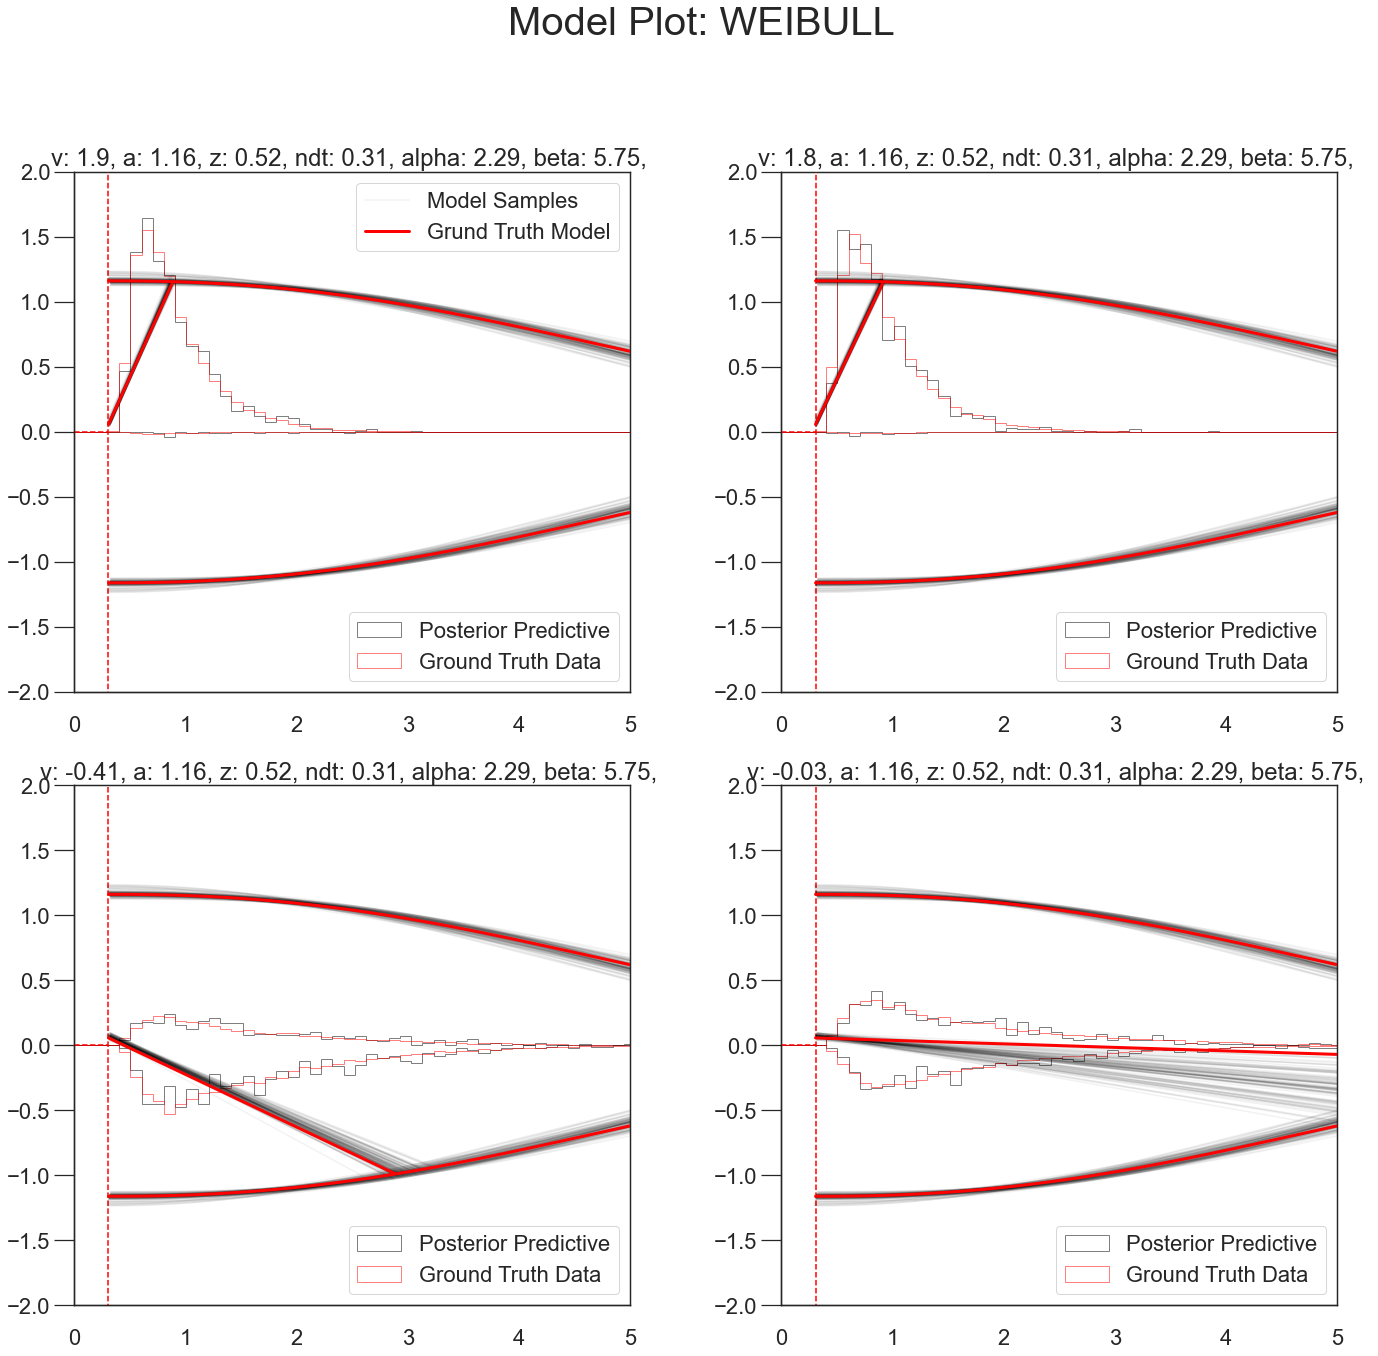

In [13]:
model_plot(posterior_samples = hddm_model_condition.get_traces(),
           ground_truths = gt_mat_condition,
           model = 'weibull_cdf',
           datatype = 'condition',
           input_hddm_trace = True,
           n_post_params = 100,
           n_plots = 1,
           cols = 2,
           show_model = True,)

In [11]:
caterpillar_plot(trace = hddm_model_condition.get_traces(),
                 gt = gt_condition,
                 datatype = 'condition')

{'v(0)': 1.8960231391905018,
 'v(1)': 1.8003645976600966,
 'v(2)': -0.4051171627585952,
 'v(3)': -0.02702836998453817,
 'a': 1.161324459709602,
 'z': 0.5244168476981462,
 't': 0.3083345901576124,
 'alpha': 2.292613849871736,
 'beta': 5.745415959475477}

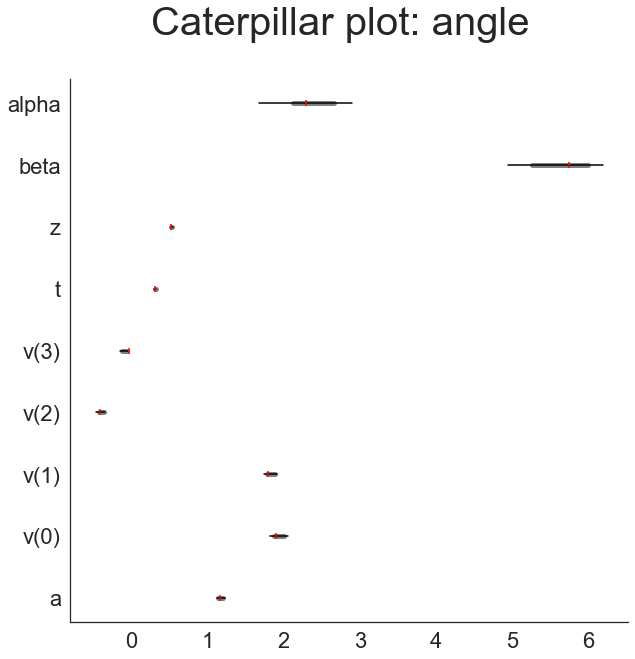

In [14]:
caterpillar_plot(trace = hddm_model_condition.get_traces(),
                 gt = gt_condition,
                 datatype = 'condition')

In [6]:
# HDDM FIT
# Preprocess our simulator data to be ready for 
hddm_dataset = hddm_preprocess(simulations)

In [7]:
# POSTERIOR PREDICTIVE 1 SUBJECT
# We define an object of the hddm model class
hddm_model = hddm.HDDMnn_angle(hddm_dataset, informative = False, free = False,  include = 'z', is_group_model = False)

In [8]:
# Sampling:
nmcmc = 600
hddm_model.sample(nmcmc, burn = int(nmcmc / 5), dbname='traces_1.db', db = 'pickle')

 [-----------------100%-----------------] 600 of 600 complete in 48.7 sec

In [9]:
# Sampling:
hddm_model.get_traces()

,a,v,t,z_trans,theta
0,1.661191,0.079779,0.004648,-0.013874,0.335455
1,1.652059,0.030649,0.007949,-0.038218,0.325500
2,1.634221,0.032162,0.007959,0.092589,0.322679
3,1.632694,0.050735,0.009754,-0.009806,0.317312
4,1.625379,0.043678,0.012020,0.036162,0.320247
...,...,...,...,...,...
475,1.654326,0.041363,0.007666,0.020335,0.323440
476,1.658101,0.047621,0.005492,0.004085,0.340977
477,1.687779,0.032111,0.002456,0.007408,0.338485
478,1.673934,-0.009343,0.005002,0.070147,0.327111


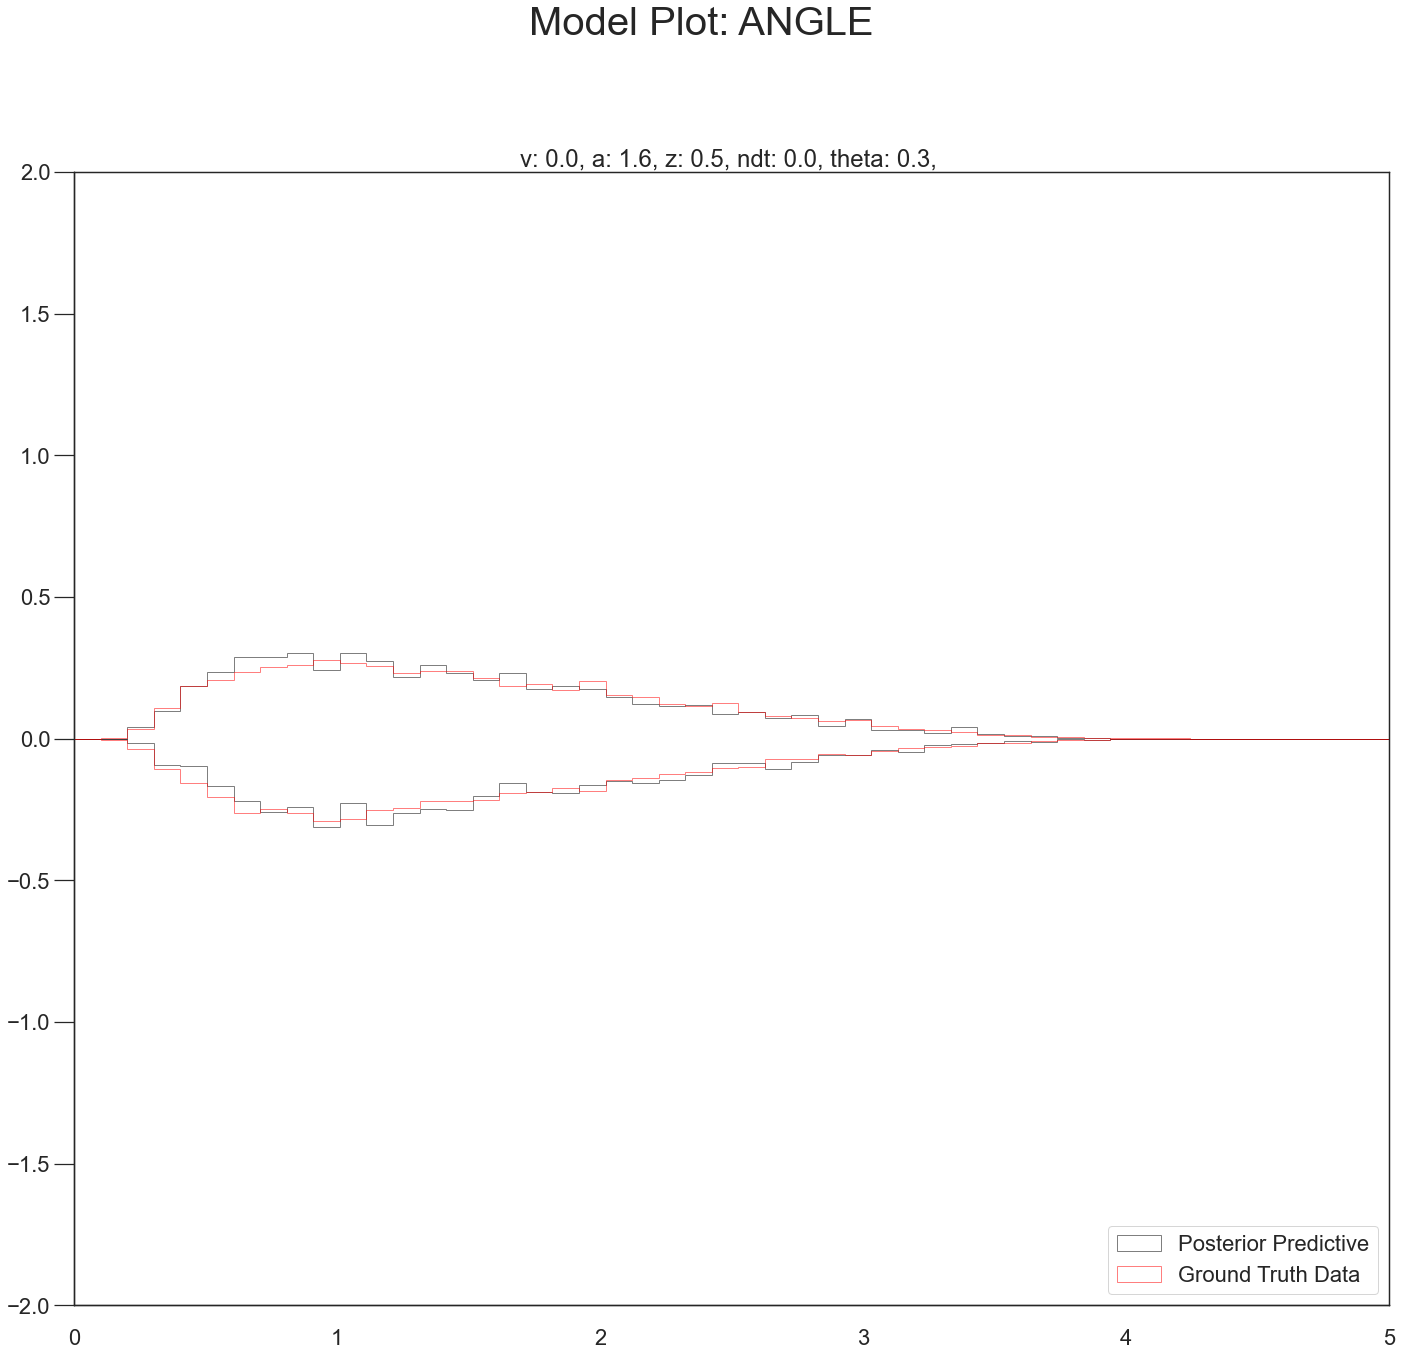

In [10]:
model_plot(posterior_samples = hddm_model.get_traces(),
           ground_truths = [0, 1.6, 0.5, 0.0, 0.3],
           model = 'angle',
           input_hddm_trace = True,
           n_post_params = 400,
           n_plots = 1,
           cols = 1,
           show_model = False)

In [5]:
caterpillar_plot(trace = hddm_model.get_traces(),
                 gt = parameter_vector)

NameError: name 'hddm_model' is not defined

In [17]:
# HIERARCHICAL DATA
(hierarchical_dataset, gt_subj, gt_global_sds , gt_global_means) = hddm_preprocess_hierarchical(model = 'angle', datasetid = 1)

In [18]:
gt_subj

,v,a,z,t,theta
0,-0.440983,1.313458,0.449723,0.858026,0.499877
1,-0.345409,1.326219,0.475996,0.799648,0.471498
2,-0.095288,1.393768,0.450178,0.723258,0.507524
3,-0.404635,1.341692,0.431621,0.821872,0.540261
4,-0.249810,1.318893,0.447823,0.893642,0.531322


In [21]:
hddm_hierarchical_model = hddm.HDDMnn_angle(hierarchical_dataset, 
                                            free = False,  
                                            informative=False, 
                                            include= 'z',
                                            is_group_model = True)

In [27]:
# Sampling:
nmcmc = 2000
hddm_hierarchical_model.sample(nmcmc,
                               burn = 1000, 
                               dbname='traces_1.db', 
                               db = 'pickle')

 [-----------------100%-----------------] 2001 of 2000 complete in 1304.1 sec

In [28]:
hddm_hierarchical_model.get_traces().mean()

a                    1.210992
a_std               35.356790
a_subj.0.0           1.393728
a_subj.1.0           1.361867
a_subj.2.0           1.488059
a_subj.3.0           1.372777
a_subj.4.0           1.340325
v                   -0.251638
v_std                8.586463
v_subj.0.0          -0.470489
v_subj.1.0          -0.340594
v_subj.2.0          -0.111720
v_subj.3.0          -0.429191
v_subj.4.0          -0.223496
t                    0.944020
t_std               34.157891
t_subj.0.0           0.831927
t_subj.1.0           0.800691
t_subj.2.0           0.706133
t_subj.3.0           0.823598
t_subj.4.0           0.897846
z_trans             -0.160650
z_std                0.128691
z_subj_trans.0.0    -0.108374
z_subj_trans.1.0    -0.075539
z_subj_trans.2.0    -0.159246
z_subj_trans.3.0    -0.254678
z_subj_trans.4.0    -0.215215
theta                0.560600
theta_std           17.976790
theta_subj.0.0       0.540892
theta_subj.1.0       0.478864
theta_subj.2.0       0.557893
theta_subj

In [103]:
param_order = {'ddm': ['v', 'a', 'z', 't'],
               'angle': ['v', 'a', 'z', 't', 'theta'],
               'weibull_cdf': ['v', 'a', 'z', 't', 'alpha', 'beta'],
              }


subj_l = []
for key in my_traces.keys():
    if '_subj' in key:
        subj_l.append(int(float(key[-3:])))
        
dat = np.zeros((max(subj_l) + 1, my_traces.shape[0], len(param_order[model])))
for key in my_traces.keys():
    if '_subj' in key:
        id_tmp = int(float(key[-3:]))
        if '_trans' in key:
            val_tmp = 1 / ( 1 + np.exp(- my_traces[key]))
        else:
            val_tmp = my_traces[key]
        dat[id_tmp, : ,param_order[model].index(key[:key.find('_')])] = val_tmp

In [98]:
gt['subj'].values

(5, 5)

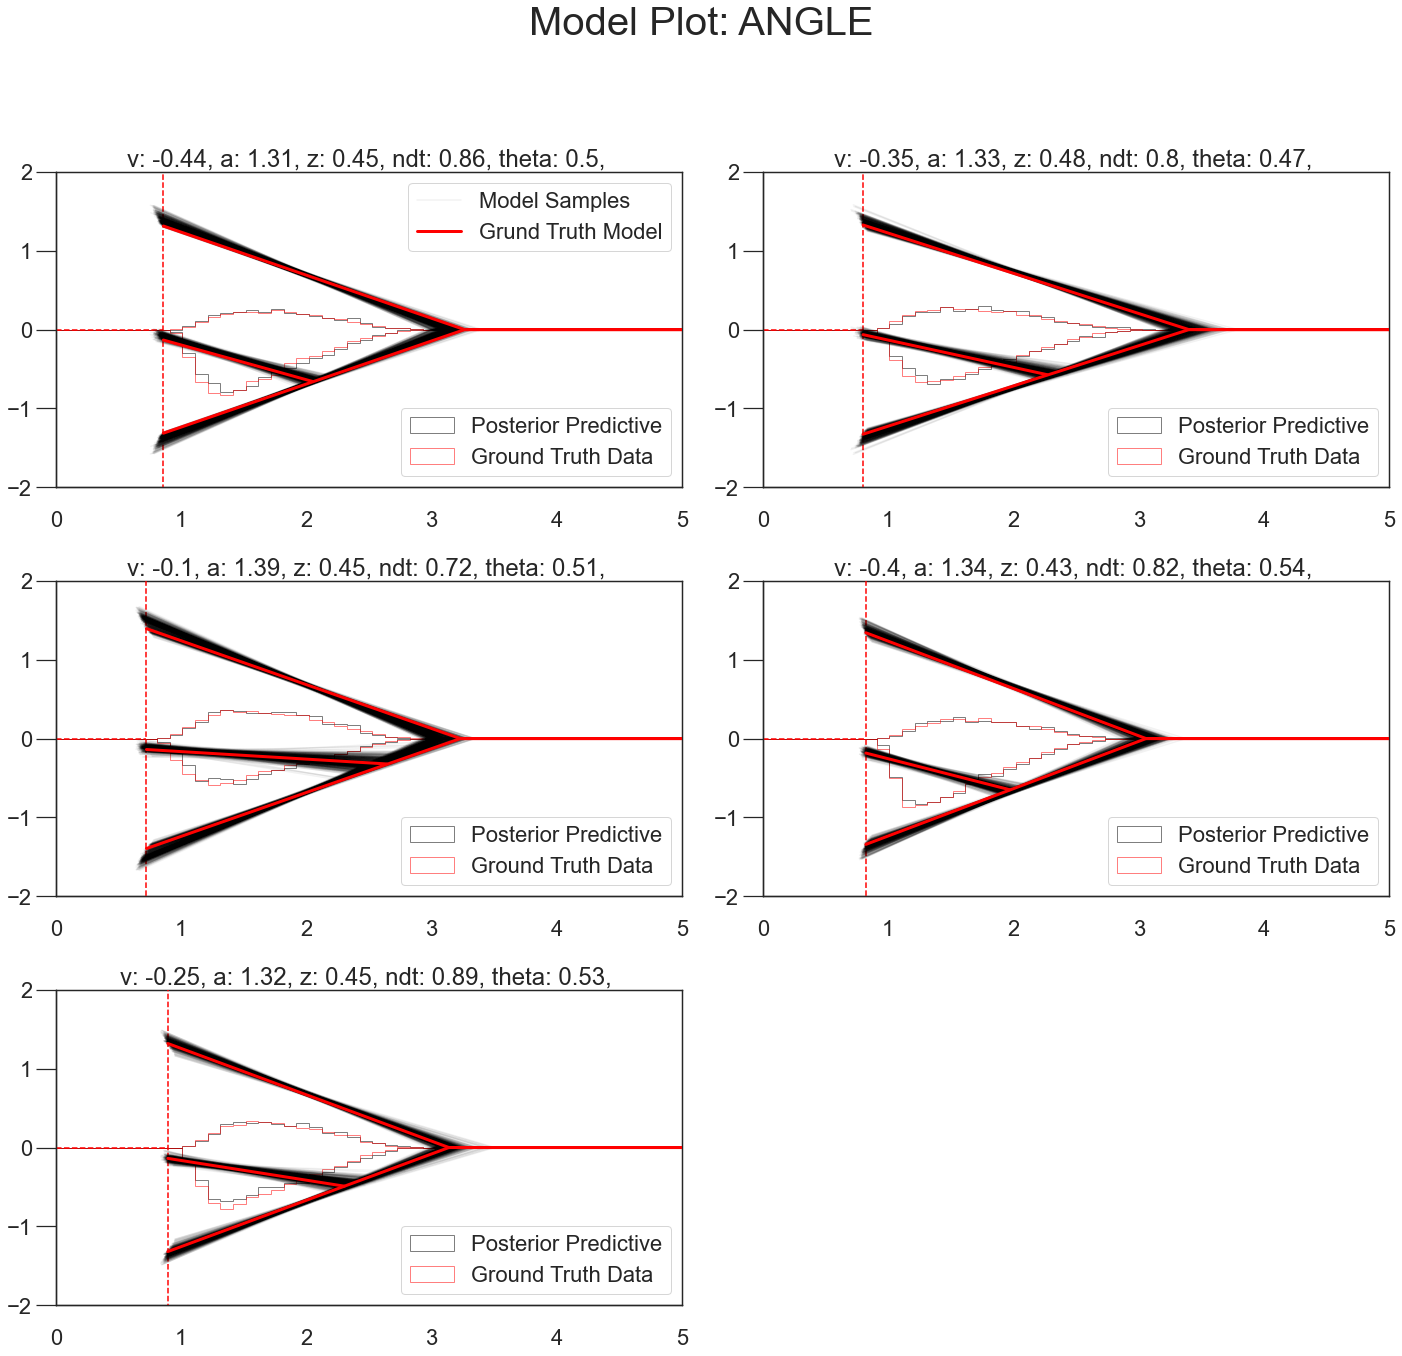

In [104]:
model_plot(ground_truths = gt['subj'].values,
           posterior_samples = dat,
           cols = 2, 
           model = 'angle',
           n_plots = 5,
           max_t = 5,
           show_model = True)

,v,a,z,t,theta
0,-0.440983,1.313458,0.449723,0.858026,0.499877
1,-0.345409,1.326219,0.475996,0.799648,0.471498
2,-0.095288,1.393768,0.450178,0.723258,0.507524
3,-0.404635,1.341692,0.431621,0.821872,0.540261
4,-0.249810,1.318893,0.447823,0.893642,0.531322


In [71]:
my_traces = hddm_hierarchical_model.get_traces()

In [37]:
gt_subj['v'][0]

-0.44098296761512756

In [42]:
params = {}
for param in gt_subj.keys():
    for i in range(gt_subj.shape[0]):
        params[param + '_subj.' + str(i) + '.0'] = gt_subj[param][i]

for param in gt_global_means.keys():
    params[param] = gt_global_means[param][0]

In [43]:
params.keys()

dict_keys(['v_subj.0.0', 'v_subj.1.0', 'v_subj.2.0', 'v_subj.3.0', 'v_subj.4.0', 'a_subj.0.0', 'a_subj.1.0', 'a_subj.2.0', 'a_subj.3.0', 'a_subj.4.0', 'z_subj.0.0', 'z_subj.1.0', 'z_subj.2.0', 'z_subj.3.0', 'z_subj.4.0', 't_subj.0.0', 't_subj.1.0', 't_subj.2.0', 't_subj.3.0', 't_subj.4.0', 'theta_subj.0.0', 'theta_subj.1.0', 'theta_subj.2.0', 'theta_subj.3.0', 'theta_subj.4.0', 'v', 'a', 'z', 't', 'theta'])

In [36]:
gt_subj.keys()

Index(['v', 'a', 'z', 't', 'theta'], dtype='object')

In [33]:
gt_global_sds

,v,a,z,t,theta
0,0.18838,0.031152,0.014843,0.034076,0.020994


In [34]:
gt_global_means

,v,a,z,t,theta
0,-0.23436,1.330553,0.441102,0.815853,0.519503


In [ ]:
def make_hierarchical_params_hddm_ready(gt_subj,
                                        gt_global_sds,
                                        gt_global_means):
    

In [29]:
hierarchical_dataset

,response,rt,subj_idx,nn_response
0,1.0,1.581020,0.0,1.0
1,1.0,1.189025,0.0,1.0
2,1.0,2.240035,0.0,1.0
3,0.0,2.078027,0.0,-1.0
4,0.0,1.655019,0.0,-1.0
...,...,...,...,...
4995,0.0,1.795634,4.0,-1.0
4996,0.0,1.600636,4.0,-1.0
4997,0.0,1.271640,4.0,-1.0
4998,0.0,1.526637,4.0,-1.0


In [55]:
hddm_hierarchical_model.get_traces()

,a,a_std,a_subj.0.0,a_subj.1.0,a_subj.2.0,a_subj.3.0,a_subj.4.0,v,v_std,v_subj.0.0,...,z_subj_trans.2.0,z_subj_trans.3.0,z_subj_trans.4.0,theta,theta_std,theta_subj.0.0,theta_subj.1.0,theta_subj.2.0,theta_subj.3.0,theta_subj.4.0
0,0.600974,3.243611,1.301297,1.360678,1.559037,1.366420,1.379998,1.037865,96.759608,-0.514959,...,-0.181322,-0.176710,-0.261946,0.539836,0.029222,0.506706,0.487594,0.580560,0.536683,0.570206
1,0.305262,90.977629,1.310898,1.379586,1.563846,1.356060,1.397003,-0.668177,53.051260,-0.514838,...,-0.178896,-0.232558,-0.254822,0.570774,0.058813,0.503240,0.484504,0.576365,0.542685,0.561137
2,1.705781,16.701482,1.309575,1.373520,1.554466,1.337933,1.406149,-0.524625,51.035862,-0.531660,...,-0.179055,-0.239759,-0.280731,0.518571,0.038683,0.515381,0.479933,0.580600,0.546267,0.578876
3,0.573488,93.565008,1.314776,1.388869,1.560920,1.354953,1.402813,-0.952540,26.793800,-0.503423,...,-0.198078,-0.281588,-0.274146,0.550303,0.049950,0.510436,0.491319,0.576830,0.549096,0.581090
4,1.607144,64.088898,1.327186,1.374506,1.555634,1.354852,1.412339,-0.828826,12.706508,-0.519885,...,-0.201222,-0.302194,-0.283761,0.536037,0.042329,0.510428,0.488274,0.586822,0.566350,0.568743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.833777,98.578101,1.311891,1.445697,1.553380,1.351759,1.413489,-0.330641,0.138449,-0.489909,...,-0.206219,-0.190522,-0.200482,1.168494,46.348032,0.496804,0.528140,0.578910,0.517120,0.568346
996,0.764770,51.579821,1.324333,1.452104,1.548038,1.330076,1.402109,-0.346099,0.196335,-0.572583,...,-0.217082,-0.183358,-0.208985,0.468084,88.103606,0.482457,0.515760,0.582143,0.522496,0.577972
997,1.819123,63.212494,1.327544,1.452185,1.556890,1.362287,1.406920,-0.398288,0.175387,-0.570336,...,-0.207040,-0.170586,-0.178765,0.040932,54.071513,0.523234,0.537304,0.586921,0.524033,0.575068
998,1.902601,51.677642,1.325901,1.445547,1.536865,1.369675,1.421309,-0.335158,0.150043,-0.464046,...,-0.216381,-0.156546,-0.192632,0.846604,73.177005,0.505840,0.501209,0.558444,0.545088,0.575067


In [57]:
gt = {}
gt['subj'] = gt_subj
gt['global_means'] = gt_global_means
gt['global_sds'] = gt_global_sds


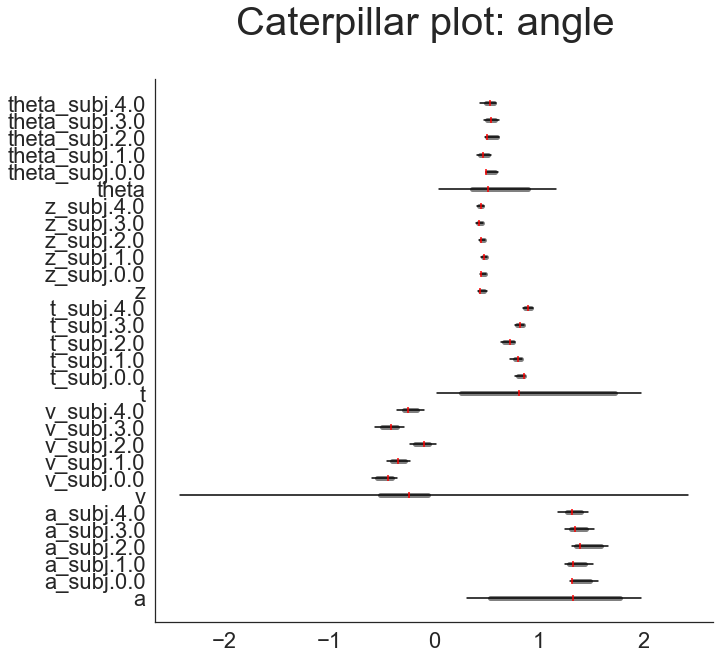

In [60]:
caterpillar_plot(trace = hddm_hierarchical_model.get_traces(),
                 gt = gt)